# Text Classification with Bag of Words - Natural Language Processing

![](https://i.imgur.com/hlEQ5X8.png)

> _"Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data."_ - Wikipedia

> _**Bag of Words**: The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears._
 
Outline:

1. Download and explore a real-world dataset
2. Apply text preprocessing techniques
3. Implement the bag of words model
4. Train ML models for text classification
5. Make predictions and submit to Kaggle


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification



In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('quora-text-classification-live')
jovian.set_colab_id('18ovabyliMaf-h6tD6p8kMzboqO1bmI-l')

     |████████████████████████████████| 68 kB 5.4 MB/s 


## Download and Explore the Data

Outline:

1. Download the dataset from Kaggle to Colab
2. Explore the data using Pandas
3. Create a small working sample

### Download the Data to Colab



In [2]:
import os

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [4]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

100% 54.9M/54.9M [00:03<00:00, 22.4MB/s]
100% 54.9M/54.9M [00:03<00:00, 19.0MB/s]
 95% 15.0M/15.8M [00:01<00:00, 24.2MB/s]
100% 15.8M/15.8M [00:01<00:00, 16.3MB/s]
 73% 3.00M/4.09M [00:00<00:00, 5.66MB/s]
100% 4.09M/4.09M [00:00<00:00, 6.18MB/s]


### Explore the Data using Pandas

In [5]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [6]:
import pandas as pd

In [7]:
raw_df = pd.read_csv(train_fname)

In [8]:
raw_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [9]:
sincere_df = raw_df[raw_df.target == 0]

In [10]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [11]:
insincere_df = raw_df[raw_df.target == 1]

In [12]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [13]:
raw_df.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

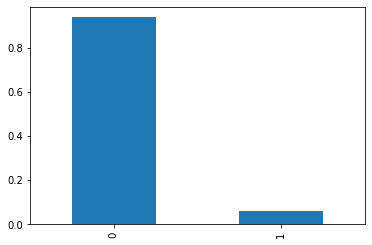

In [14]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [15]:
test_df = pd.read_csv(test_fname)

In [16]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [17]:
sub_df = pd.read_csv(sample_fname)

In [18]:
sub_df.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [19]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

### Create a Working Sample


In [20]:
SAMPLE_SIZE = 100_000

In [21]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state = 42)

In [22]:
sample_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


## Text Preprocessing Techniques

Outline:

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

In [23]:
q0 = sincere_df.question_text.values[1]

In [24]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [25]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]

In [26]:
q1

'Has the United States become the largest dictatorship in the world?'

### Tokenization

splitting a document into words and separators

In [27]:
import nltk

In [28]:
from nltk.tokenize import word_tokenize

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
q0_tok = word_tokenize(q0)

In [31]:
q1_tok = word_tokenize(q1)

In [32]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [33]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

### Stop Word Removal

Removing commonly occuring words

In [34]:
from nltk.corpus import stopwords

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
eng_stop = stopwords.words('english')

In [37]:
", ".join(eng_stop)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [38]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in eng_stop]

In [39]:
q0_stop = remove_stopwords(q0_tok)

In [40]:
q0_stop

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [41]:
q1_stop = remove_stopwords(q1_tok)

In [42]:
q1_stop

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Stemming

"go", "gone", "going" -> "go"
"birds", "bird" -> "bird"

In [43]:
from nltk.stem.snowball import SnowballStemmer

In [44]:
stemmer = SnowballStemmer(language = 'english')

In [46]:
q0_stem = [stemmer.stem(word) for word in q0_stop]

In [47]:
q0_stem

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [48]:
q1_stem = [stemmer.stem(word) for word in q1_stop]

In [49]:
q1_stem

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatization

"love" -> "love"
"loving" -> "love"
"lovable" -> "love"


## Implement Bag of Words 


Outline:

1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

### Create a Vocabulary

In [51]:
small_df = sample_df[:5]
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [52]:
small_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
small_vect = CountVectorizer()

In [56]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [57]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [59]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform documents into Vectors

In [61]:
vectors = small_vect.transform(small_df.question_text)

In [62]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [64]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

### Configure Count Vectorizer Parameters

In [66]:
stemmer = SnowballStemmer(language = 'english')

In [68]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [69]:
vectorizer = CountVectorizer(lowercase = True, tokenizer = tokenize, stop_words = eng_stop, max_features = 1000)

In [70]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [71]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 22.8 s, sys: 41.9 ms, total: 22.9 s
Wall time: 22.8 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f24a3d7e0e0>)

In [74]:
len(vectorizer.vocabulary_)

1000

In [75]:
inputs = vectorizer.transform(sample_df.question_text)

In [76]:
inputs.shape

(100000, 1000)

In [77]:
test_inputs = vectorizer.transform(test_df.question_text)

In [78]:
test_inputs.shape

(375806, 1000)

## ML Models for Text Classification

Outline:

- Create a training & validation set
- Train a logistic regression model
- Make predictions on training, validation & test data

### Split into Training and Validation Set

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, test_size = 0.3, random_state = 42)

In [81]:
train_inputs.shape

(70000, 1000)

In [82]:
val_inputs.shape

(30000, 1000)

### Train Logistic Regression model

In [83]:
from sklearn.linear_model import LogisticRegression

In [86]:
MAX_ITER = 1000

In [87]:
model = LogisticRegression(max_iter = 1000, solver = 'sag')

In [88]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions using the model

In [89]:
train_preds = model.predict(train_inputs)

In [90]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
from sklearn.metrics import accuracy_score, f1_score

In [92]:
accuracy_score(train_targets, train_preds)

0.9504428571428571

In [94]:
f1_score(train_targets, train_preds)

0.4457581083240134

In [95]:
val_preds = model.predict(val_inputs)

In [96]:
accuracy_score(val_targets, val_preds)

0.9467

In [97]:
f1_score(val_targets, val_preds)

0.40843507214206437

In [98]:
sincere_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [100]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [101]:
insincere_df.head()

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


In [102]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## Make Predictions and Submit to Kaggle

In [103]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [104]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2056612 stored elements in Compressed Sparse Row format>

In [105]:
test_preds = model.predict(test_inputs)

In [106]:
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
sub_df.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [109]:
sub_df.prediction = test_preds

In [111]:
sub_df.prediction.value_counts()

0    364965
1     10841
Name: prediction, dtype: int64

In [112]:
sub_df.to_csv('submission.csv', index = None)